Colab link:

https://colab.research.google.com/drive/15S-0Jcsp6udT4Jup97KKza_agEzVQEsT?usp=sharing

All materials(video + pdf + quastions):

https://drive.google.com/file/d/104cg9mopg5RXkmAgX2lt_xBolon9Abi4/view

# CNNs

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


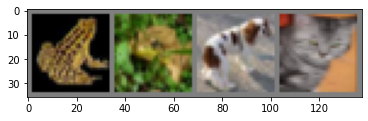

In [2]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 20
batch_size = 4
learning_rate = 0.001

# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

Cifar-10:

https://www.cs.toronto.edu/~kriz/cifar.html

In [8]:
print(images.shape)
#------------------
conv1 = nn.Conv2d(3,6,5)   # (input channles, output channel, ketnel_size) defalt: P=0, S=1 | formula = (n-F +2P)/S +1 |
pool = nn.MaxPool2d(2,2)   # (kernel_size, stride) | 
conv2 = nn.Conv2d(6,16,5)
#------------------
x = conv1(images)
print(x.shape)
y = pool(x)
print(y.shape)
z = conv2(y)
print(z.shape)
w = pool(z)
print(w.shape)

torch.Size([4, 3, 32, 32])
torch.Size([4, 6, 28, 28])
torch.Size([4, 6, 14, 14])
torch.Size([4, 16, 10, 10])
torch.Size([4, 16, 5, 5])


Convolution visualization:

https://cs231n.github.io/convolutional-networks/

## LeNet implementation

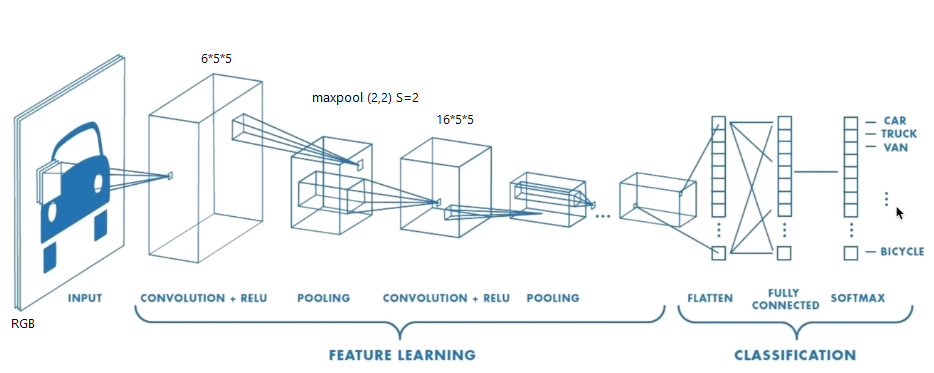

In [9]:
# define model
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)      # (input channles, output channel, ketnel_size)
        self.pool = nn.MaxPool2d(2, 2)       # (kernel_size, stride)
        self.conv2 = nn.Conv2d(6, 16, 5)     
        self.fc1 = nn.Linear(16 * 5 * 5, 120)# Fully Connected layer (input_size, output_size) why 16*5*5 ?
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)         # number of classes = 10
        # order doesn't matter hear

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14  first conv layer
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5   second conv layer
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400        flatten
        x = F.relu(self.fc1(x))               # -> n, 120        first fc layer
        x = F.relu(self.fc2(x))               # -> n, 84         second fc layer
        x = self.fc3(x)                       # -> n, 10         third fc layer
        # no softmax and activation function here
        return x

In [10]:
model = LeNet().to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs): # loop over epoches
    for i, (images, labels) in enumerate(train_loader): # loop over batches
        # origin shape: [4, 3, 32, 32] = 4, 3, 1024
        # input_layer: 3 input channels, 6 output channels, 5 kernel size
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass and Loss
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Email: arash.lagzian94@gmail.com